# HW 3

Dennis Wang
MA 707 - Machine Learning

Load a data set, preprocess if needed, then (1) plot a dendrogram for one of the hierarchical clustering methods (you can choose which), (2) use MDS or PCA (you choose) to reduce the dimension (number of features/columns) of your data frame down to 2, then choose a value of k (the number of clusters) and perform k-means clustering on this 2-dimensional data set and scatterplot the result with colors indicating the clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preprocessing

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Vectorizing categorical variables

In [4]:
tips = pd.get_dummies(tips, columns = ['sex', 'smoker', 'day', 'time'], drop_first = True)

In [5]:
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


#### Normalizing values

In [6]:
from sklearn.preprocessing import Normalizer

In [7]:
normalizer = Normalizer()
normalizer.fit(tips) 
norm_values = normalizer.transform(tips)

tips_norm = pd.DataFrame(norm_values, columns = tips.columns)
tips_norm.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,0.984733,0.058539,0.115919,0.05796,0.057960,0.0,0.0,0.057960,0.057960
1,0.937404,0.150492,0.271974,0.00000,0.090658,0.0,0.0,0.090658,0.090658
2,0.973614,0.162192,0.139022,0.00000,0.046341,0.0,0.0,0.046341,0.046341
3,0.984364,0.137595,0.083139,0.00000,0.041569,0.0,0.0,0.041569,0.041569
4,0.973756,0.142955,0.158399,0.03960,0.039600,0.0,0.0,0.039600,0.039600


### Plotting a Dendrogram using Agglomerative Hierarchical Clustering Method

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

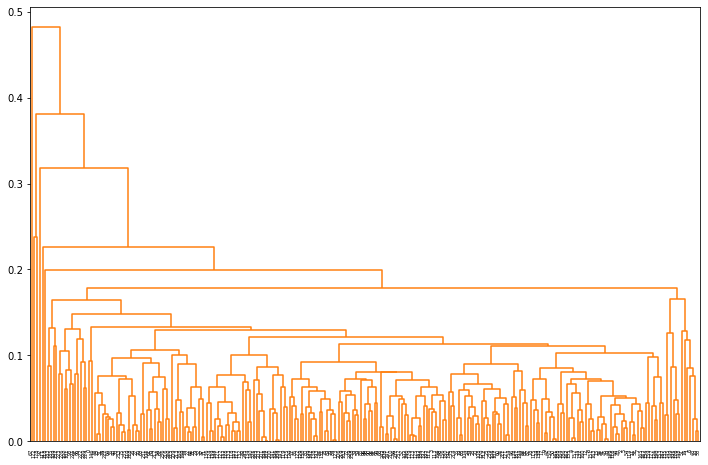

In [9]:
Z = linkage(tips_norm, method = 'average')
plt.figure(figsize = (12,8))
dendrogram(Z, labels = tips_norm.index, color_threshold=2.75)
plt.show()

### Using PCA to reduce dimensions of dataframe to 2

In [10]:
from sklearn.decomposition import PCA

In [11]:
# keep the first 2 principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to data
pca.fit(tips_norm)
# transform data onto the first two principal components
tips_pca = pca.transform(tips_norm)
print("Original shape: {}".format(str(tips_norm.shape)))
print("Reduced shape: {}".format(str(tips_pca.shape)))

Original shape: (244, 9)
Reduced shape: (244, 2)


### Choose a value of k (the number of clusters) and perform k-means clustering on this 2-dimensional data set and scatterplot the result with colors indicating the clusters

In [12]:
from sklearn.cluster import SpectralClustering

In [13]:
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')

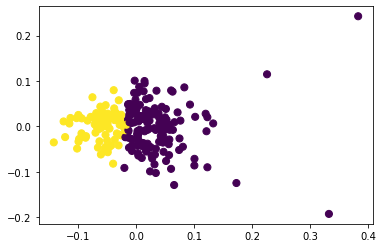

In [14]:
labels = model.fit_predict(tips_pca)
plt.scatter(tips_pca[:,0], tips_pca[:,1], c = labels, s = 50, cmap='viridis')

## Conceptual

Briefly (2-3 sentences) describe

>1. agglomerative hierarchical clustering

Agglomerative hierarchical clustering is where we begin with a separate cluster for each data point and slowly merge each pair of similar clusters into one cluster, and this process continues until we're left with one single big cluster. This whole process can be represented in a tree-based diagram called a dendrogram. To see which clusters should be combined, we use some notion of distance to compute their similarity. The most common distatance metrics are minimum, maximum, average, and centroid.

>2. the k-means clustering algorithm

K-means clustering is a non-hierarchical clustering algorithm, meaning that the user initially specifies the number of clusters (k) ad the algorithm finds of way of splitting the data into that many clusters. Initially, the data points are randomly distributed into these k clusters. At each step, we compute the centroid of each cluster and then reassign each data point to be in the cluster corresponding to the centroid it's closest to. We thenn recompute the new cenntroids of the clusters and repeat until the "improvement", measured by the sum of distances of points in each cluster from the cluster centroid, is negligible. 

>3. multidimensional scaling

We're comfortable with the idea of representing a data point as the values of its predictors, or a vector (like coordinates). However, sometimes you have data that you can't put coordinates on, such as defining a relationship as the classes shared between students, but you can still describe some notion of distance, for example the reciprocal of the number of classes shared between a pair of students. MDS takes this notion of distance, and given a dimension d, turrns it into an Euclidean distance.

>4. why non-linear dimension reduction methods are sometimes helpful

Sometimes our data naturally forms a lower-dimensional shape but is embedded in a higher-dimensional space. Our dimension reduction methods would work well if the embedding was done linear, but if the embedding is non-linear, then usually MDS and PCA would not work well. If we try to use these linear dimension reduction methods on this kind of data, then it might likely distort the "image" of the data.